In [178]:
import os
os.listdir()

['.git',
 'analysi.ipynb',
 'book.csv',
 'Customer.csv',
 'data-export.csv',
 'diwalisale.csv',
 'f2.csv',
 'first.ipynb',
 'googleplaystore.csv',
 'main.html',
 'NCRB_Table_1A.1.csv',
 'Project 1.ipynb',
 'project2.ipynb',
 'project3.ipynb',
 'project5.ipynb',
 'project6.ipynb',
 'project7.ipynb',
 'Rainfalldistrict_2.csv',
 'scholarship.csv',
 'taklu.ipynb',
 'Video_Games_5.json',
 'Video_Games_5.json.gz',
 'webscraping.ipynb']

In [179]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_json("Video_Games_5.json",lines=True) 

In [180]:
df.shape 

(497577, 12)

In [181]:
df['image'].isnull().sum() 
df=df.drop(columns=['image'])

In [182]:
import re 
df['style']=df['style'].fillna('unknown').astype(str).str.extract(r"'Platform:':\s*'([^']*)'")[0].fillna('unknown')

In [183]:
df['vote']=pd.to_numeric(df['vote'].str.replace(',',''),errors='coerce').fillna(0).astype(int)


In [184]:
df['unixReviewTime'].isnull().sum()
df['unixReviewTime']=pd.to_datetime(df['unixReviewTime'],unit='s')

In [185]:
df=df.drop(columns='reviewTime',axis=1)
df=df.dropna(subset='summary',axis=0)
df['summary']=df['summary'].astype(str)
df['summary']=df['summary'].str.lower()
df['summary']=df['summary'].str.strip()

In [186]:
df=df.dropna(subset='reviewText',axis=0)
df['reviewText']=df['reviewText'].astype(str)
df['reviewText']=df['reviewText'].str.lower()
df['reviewText']=df['reviewText'].str.strip()

In [187]:
df=df.dropna(subset='reviewerName')

In [188]:
df['reviewerName']=df['reviewerName'].astype(str)
df['reviewerName']=df['reviewerName'].str.lower()
df['reviewerName']=df['reviewerName'].str.strip()

In [189]:
df['reviewerID']=df['reviewerID'].astype(str)

In [190]:
df['verified']=df['verified'].map({True: 1,False: 0})
df['verified']=df['verified'].astype(int)

In [191]:
# Basic Dataset Overview After Data Cleaning Process.
df.describe()
df.isnull().sum()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 497240 entries, 0 to 497576
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   overall         497240 non-null  int64         
 1   verified        497240 non-null  int64         
 2   reviewerID      497240 non-null  object        
 3   asin            497240 non-null  object        
 4   reviewerName    497240 non-null  object        
 5   reviewText      497240 non-null  object        
 6   summary         497240 non-null  object        
 7   unixReviewTime  497240 non-null  datetime64[ns]
 8   vote            497240 non-null  int64         
 9   style           497240 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 41.7+ MB


(497240, 10)

'products generally perform well (high satisfaction),but ~11%\nnegative reviews indicate issue (maybe product quality).\nTarget neutral group convert into positive group in upcoming year/month.'

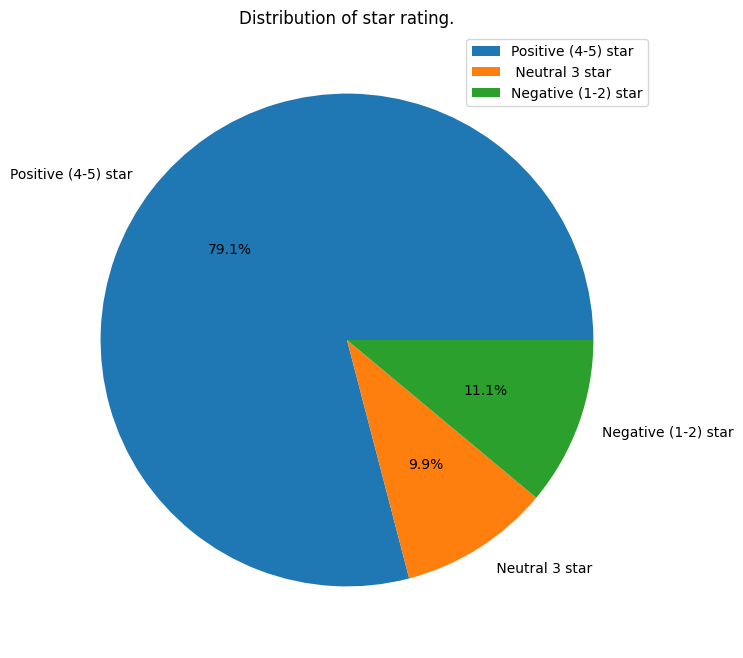

In [192]:
plt.figure(figsize=(8,8))
total=len(df)
positive=df[df["overall"].isin([4,5])].shape[0]
neutral=df[df["overall"]==3].shape[0]
negative=df[df["overall"].isin([1,2])].shape[0]
#print("Positive % :",round((positive/total)*100,2))
#print("Neutral % :",round((neutral/total)*100,2))
#print("Negative % :",round((negative/total)*100,2))
size=[positive,neutral,negative]
plt.pie(size,labels=("Positive (4-5) star"," Neutral 3 star","Negative (1-2) star"),autopct='%1.1f%%')
plt.legend()
plt.title("Distribution of star rating.")

'''products generally perform well (high satisfaction),but ~11%
negative reviews indicate issue (maybe product quality).
Target neutral group convert into positive group in upcoming year/month.'''


In [193]:
df.head(1)

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style
0,5,1,A1HP7NVNPFMA4N,0700026657,ambrosia075,"this game is a bit hard to get the hang of, bu...",but when you do it's great.,2015-10-17,0,unknown


C:\Users\HP\AppData\Local\Temp\ipykernel_5648\2805959947.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=["False","True"])


' Number of verified and non-verified user in data set '

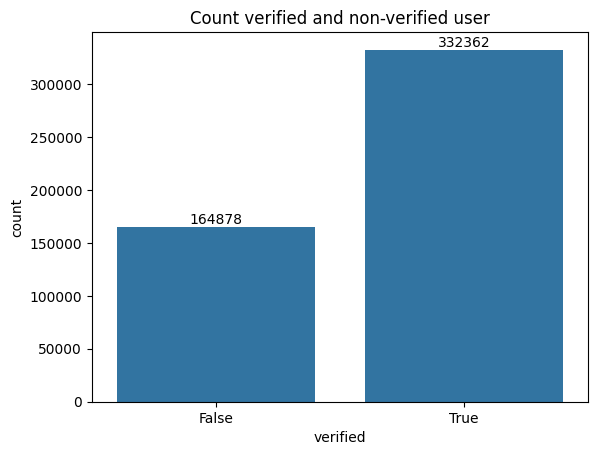

In [194]:
ax=sns.countplot(data=df,x="verified")
ax.set(xticklabels=["False","True"])
for bin in ax.containers:
    ax.bar_label(bin)
plt.title("Count verified and non-verified user")
 
''' Number of verified and non-verified user in data set ''' 

' Non-verified users give 1-2 stars more and they \n    give fake and biased reviews'

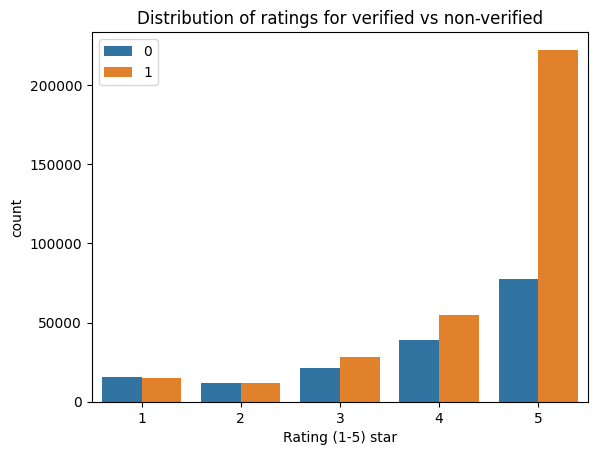

In [195]:
ax=sns.countplot(data=df,x="overall",hue="verified")
plt.title("Distribution of ratings for verified vs non-verified")
plt.xlabel("Rating (1-5) star")
plt.legend()

''' 0 for false
    1 for true '''

''' Verified users usually higher % of 4-5 stars 
    because it uses genuine product'''

''' Non-verified users give 1-2 stars more and they 
    give fake and biased reviews'''

In [196]:
df["reviewerID"].nunique()

''' 55205 is unique reviewer in dataset '''

' 55205 is unique reviewer in dataset '

In [197]:
top_review=df.groupby("reviewerID").size().reset_index(name="review_count")
top_review=top_review.sort_values('review_count',ascending=False).head(10)
print(top_review)

''' Top 10 reviewerID based on number of review '''

           reviewerID  review_count
41838  A3V6Z4RCDGRC44           815
48613   AJKWF4W7QD4NS           795
42225  A3W4D8XOGLWUN5           521
25287  A2QHS1ZCIQOL7E           472
26419  A2TCG2HV1VJP6V           453
18438  A29BQ6B90Y1R5F           411
567    A119Q9NFGVOEJZ           353
16718  A2582KMXLK2P06           314
14771  A20DZX38KRBIT8           282
43583   A74TA8X5YQ7NE           262


' Top 10 reviewerID based on number of review '

In [198]:
avg_ratings=df.groupby("reviewerID")['overall'].mean().reset_index(name="avg_rating")
top_review=top_review.merge(avg_ratings,on='reviewerID')
print(top_review)

''' Top 10 reviewerID based on average rating '''

       reviewerID  review_count  avg_rating
0  A3V6Z4RCDGRC44           815    4.294479
1   AJKWF4W7QD4NS           795    3.676730
2  A3W4D8XOGLWUN5           521    3.758157
3  A2QHS1ZCIQOL7E           472    3.669492
4  A2TCG2HV1VJP6V           453    4.079470
5  A29BQ6B90Y1R5F           411    4.209246
6  A119Q9NFGVOEJZ           353    5.000000
7  A2582KMXLK2P06           314    3.554140
8  A20DZX38KRBIT8           282    3.294326
9   A74TA8X5YQ7NE           262    3.706107


' Top 10 reviewerID based on average rating '